In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
iris = pd.read_csv(r"C:\Users\hp\Desktop\Iris.csv")

In [18]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [22]:
#drop Id to prevent it from being plotted
iris = iris.drop('Id', axis=1)

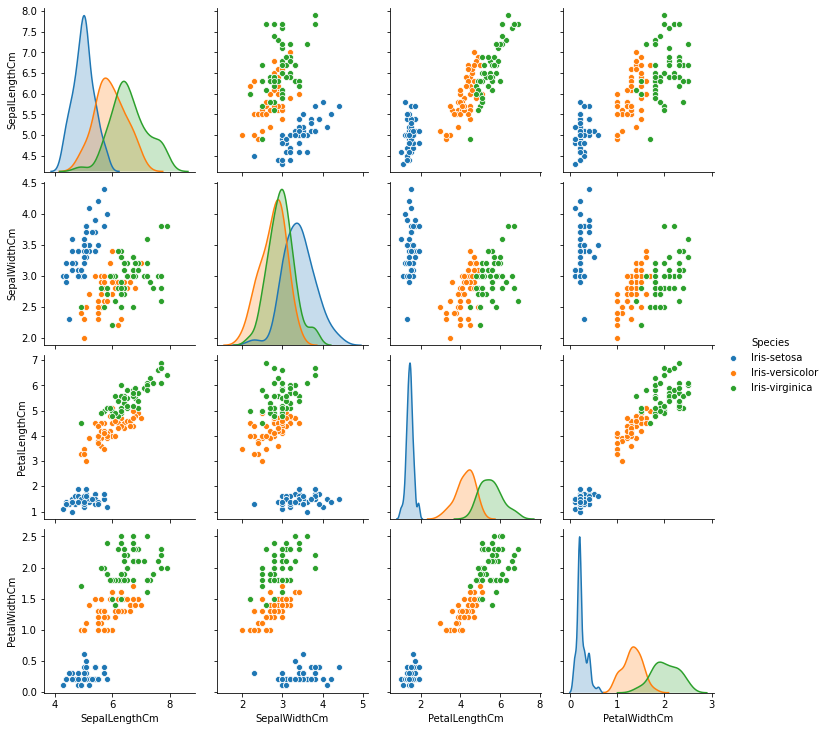

In [23]:
# plot each attribute against species
#`hue="species" indicatesyou want to colour the data points for each species differently.
speciesPairPlot = sns.pairplot(iris,hue='Species')

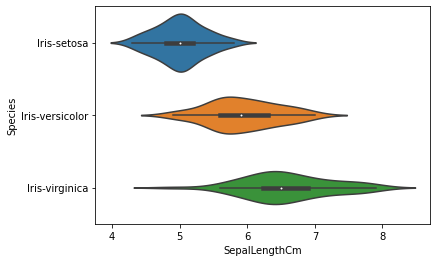

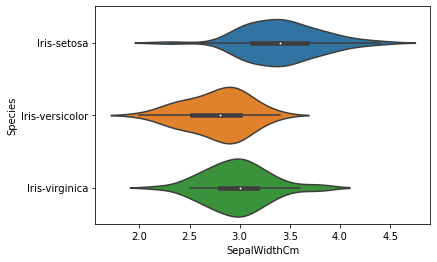

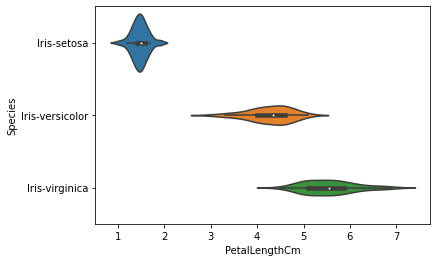

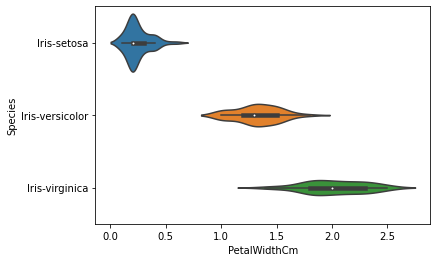

In [24]:
#Violin plot
sepalL = sns.violinplot(y='Species', x='SepalLengthCm', data=iris)
plt.show()
sepalW = sns.violinplot(y='Species', x='SepalWidthCm', data=iris)
plt.show()
petalL = sns.violinplot(y='Species', x='PetalLengthCm', data=iris)
plt.show()
petalW = sns.violinplot(y='Species', x='PetalWidthCm', data=iris)

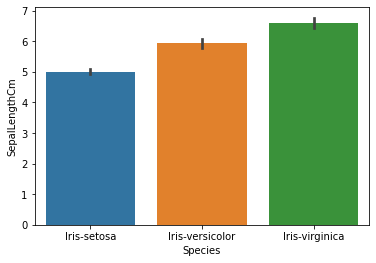

In [25]:
sns.barplot(y = iris['SepalLengthCm'],x=iris['Species'])

In [26]:
X = iris.drop(['Species'], axis=1)

In [27]:
y = iris.Species

In [28]:
#splitting the data
#test size indicates the percentage of the whole data that will be used as the test data.ie if 0.4 the 40% of the 150 or 60entries are assigned as label test data and feature test data.
#the rest ie 90entries are treated as training data.
#train_test_split function from sklearn always assign random data as test and train,ie everytime you execute the train_test_split function, the data that will be assigned to the train label, train feature, test label, and test feature are always different. 
#to ensure the same data is always treated to the same train or test, label or feature data a random state is assigned. This random state make sure each execution will give the same output as train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [30]:
#to train the data,command the KNN algorithm to execute the fit function, 
#to test the data, use predict function.evaluate which k value is the best by plotting each result by using matplotlib
rangeK = list(range(1,26))
scores = []
for i in rangeK:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

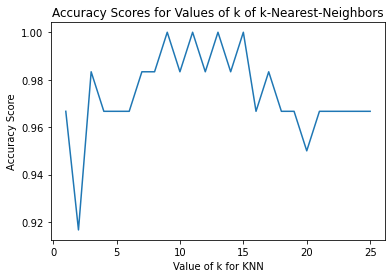

In [31]:
plt.plot(rangeK, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
one = knn.predict([[6, 3, 4, 2]])
print (one)
two = knn.predict([[10,9,5,4]])
print(two)

['Iris-versicolor']
['Iris-virginica']


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)
y_pred = logisticReg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [35]:
score = logisticReg.score(X,y)
print(score)

0.9733333333333334


In [36]:
one1 = logisticReg.predict([[6, 3, 4, 2]])
print (one1)
two2 = logisticReg.predict([[10,9,5,4]])
print(two2)

['Iris-versicolor']
['Iris-virginica']


In [37]:
logisticReg.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)